## Chocolate Bar Analysis

In [91]:
# Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [92]:
# Import data and dispaly first rows
df = pd.read_csv('C:/Users/nickm/Desktop/Coding/Projects/python-pandas-project/Chocolate bar ratings 2022.csv')
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [93]:
# Display DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2588 non-null   int64  
 1   Company (Manufacturer)            2588 non-null   object 
 2   Company Location                  2588 non-null   object 
 3   Review Date                       2588 non-null   int64  
 4   Country of Bean Origin            2588 non-null   object 
 5   Specific Bean Origin or Bar Name  2588 non-null   object 
 6   Cocoa Percent                     2588 non-null   object 
 7   Ingredients                       2501 non-null   object 
 8   Most Memorable Characteristics    2588 non-null   object 
 9   Rating                            2588 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 202.3+ KB


In [94]:
# Print descriptive statistics of numerical columns
df.describe()

,REF,Review Date,Rating
count,2588.000000,2588.000000,2588.000000
mean,1459.185471,2014.545209,3.198319
std,773.852201,4.082722,0.444069
min,5.000000,2006.000000,1.000000
25%,820.000000,2012.000000,3.000000
50%,1470.000000,2015.000000,3.250000
75%,2122.000000,2018.000000,3.500000
max,2768.000000,2022.000000,4.000000


In [95]:
# Count unique values in each column
df.nunique()

REF                                  644
Company (Manufacturer)               593
Company Location                      65
Review Date                           17
Country of Bean Origin                63
Specific Bean Origin or Bar Name    1643
Cocoa Percent                         46
Ingredients                           21
Most Memorable Characteristics      2545
Rating                                12
dtype: int64

In [96]:
# Display number of NAs for each column
df.isna().sum()

REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

In [97]:
# Show rows with NAs in 'Ingredients'
df[df['Ingredients'].isna()].head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
88,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70%,NaN,"raisins, pungent",3.00
89,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70%,NaN,"few grits, blackcherry, licorice",3.50
167,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100%,NaN,"very nutty, very bitter",1.75
303,81,Bonnat,France,2006,Blend,One Hundred,100%,NaN,"acidic, bitter, dry",1.50
330,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100%,NaN,"cardboard, very bitter, floral",1.50


In [98]:
# show 5 most frequent values for each column
for col in df.columns:
    print(df[col].value_counts().head())

REF
414     10
24       9
387      9
404      9
1466     8
Name: count, dtype: int64
Company (Manufacturer)
Soma        57
Fresco      39
Arete       32
Bonnat      30
A. Morin    29
Name: count, dtype: int64
Company Location
U.S.A.    1168
France     179
Canada     178
U.K.       134
Italy       79
Name: count, dtype: int64
Review Date
2015    284
2014    247
2018    228
2016    217
2012    194
Name: count, dtype: int64
Country of Bean Origin
Venezuela             254
Peru                  248
Dominican Republic    234
Ecuador               223
Madagascar            184
Name: count, dtype: int64
Specific Bean Origin or Bar Name
Madagascar            56
Ecuador               44
Peru                  42
Dominican Republic    38
Chuao                 28
Name: count, dtype: int64
Cocoa Percent
70%    1070
75%     312
72%     309
65%      93
80%      90
Name: count, dtype: int64
Ingredients
3- B,S,C        1029
2- B,S           738
4- B,S,C,L       293
5- B,S,C,V,L     184
4- B,S,C,V      

# Recodes

In [99]:
# Ingredients - Number and Type of
print(df['Ingredients'].value_counts().head())
# In total, 7 different ingredients occur: B, S, S*, C, V, L, Sa

# Split 'Ingredients' column at '-' into No. of and List of Ingredients
# e.g.: '6-B,S,C,V,L,Sa' -> ['6', 'B,S,C,V,L,Sa']
df['Number of Ingredients'] = df['Ingredients'].str.split('-').apply(pd.Series)[0]
df['List of Ingredients'] = df['Ingredients'].str.split('-').apply(pd.Series)[1].str.strip()

# Expand occuring ingredients into 6 columns in order of appearance
# e.g. 'B,S,V' -> ['B', 'S', 'V', None, None, None]
ls_ingredients = df['List of Ingredients'].str.split(',').apply(pd.Series)
for col_nr, col in enumerate(ls_ingredients):
    df[f'Ingredient #{col_nr+1}'] = ls_ingredients[col_nr]

# Create a column for each ingredient indicating whether it's present in the chocolate bar
# e.g. 'B,S,V' -> [True, True, False, False, False, True, False]
unique_ingredients = ['B', 'S', 'S*', 'C', 'V', 'L', 'Sa']

def ingr_fun(cols, ingr):
    if cols.notna().sum() == 0:
        return np.NAN
    else:
        return (cols == ingr).sum() > 0

for i in unique_ingredients:
    #df[f'Ingredient {i}'] = df.filter(like='Ingredient #').apply(lambda x: np.NAN if x.notna().sum() == 0 else (x == i).sum() > 0, axis=1)
    df[f'Ingredient {i}'] = df.filter(like='Ingredient #').apply(ingr_fun, ingr=i, axis=1)

print('\nIngredient Count:\n', df.loc[:,'Ingredient B':'Ingredient Sa'].astype('boolean').sum())


Ingredients
3- B,S,C        1029
2- B,S           738
4- B,S,C,L       293
5- B,S,C,V,L     184
4- B,S,C,V       141
Name: count, dtype: int64

Ingredient Count:
 Ingredient B     2501
Ingredient S     2417
Ingredient S*      77
Ingredient C     1706
Ingredient V      353
Ingredient L      500
Ingredient Sa      37
dtype: int32


In [100]:
# Most Memorable Characteristics - Number and Type of
#print(df['Most Memorable Characteristics'].value_counts().head())
# exemplary format: 'spicy, cocoa', 'sandy, sweet, cocoa'

# split characteristics into columns
characts = df['Most Memorable Characteristics'].str.split(',').apply(lambda x: [e.strip() for e in x]).apply(pd.Series)
for col_nr, col in enumerate(characts):
    df[f'Characteristic #{col_nr+1}'] = characts[col_nr]

# create a list with all mentioned characteristics
ls_characts = []
for col in range(len(characts.columns)):
    ls_characts.extend(characts.loc[characts[col].notna()][col].to_list())

all_charact_counts = pd.DataFrame(ls_characts).value_counts().rename_axis('charact').reset_index(name='counts')
#print(all_charact_counts[:20])
top_characts = all_charact_counts[:20]['charact'].tolist()

for i in top_characts:
    df[f'Characteristic - {i}'] = df['Most Memorable Characteristics'].apply(lambda x: i in x)

# Check results
print(all_charact_counts[:20].head())
print(df.filter(like='Characteristic - ').sum().head())

# Counts differ e.g. 'sweet': n=276 in all_charact_counts vs. n=324 in column 'Characteristic - sweet'
print(all_charact_counts[all_charact_counts['charact'].str.contains('sweet')].head())
# Reason: there are entries not solely containing the attribute 'sweet' but slightly more 
#  specific evaluation, e.g. 'very sweet', 'too sweet'
print('Number of unique characteristics containing the word "cocoa":',
      len(all_charact_counts[all_charact_counts['charact'].str.contains('cocoa')]))
# Looking at 'cocoa', there are 51 unique evaluations containing this word, e.g. 'rich cocoa', 
# 'sweet cocoa',... This way of computation should be fine, as e.g. 'sweet cocoa' can certainly 
# be associated with both 'sweet' and 'cocoa', while 'very sweet' is still 'sweet'.

  charact  counts
0   sweet     276
1   nutty     265
2   cocoa     261
3  roasty     219
4  earthy     197
Characteristic - sweet     324
Characteristic - nutty     282
Characteristic - cocoa     431
Characteristic - roasty    233
Characteristic - earthy    207
dtype: int64
          charact  counts
0           sweet     276
123    sweet edge      11
129    very sweet      10
154     too sweet       7
240  overly sweet       3
Number of unique characteristics containing the word "cocoa": 51


In [101]:
# Rating - Categories
# The ratings are between 1 and 5 with 1 considered the lowest rating and 5 as the highest rating possible.
# 4.0 - 5.0 = Outstanding
# 3.5 - 3.9 = Highly Recommended
# 3.0 - 3.49 = Recommended
# 2.0 - 2.9 = Disappointing
# 1.0 - 1.9 = Unpleasant
print(df['Rating'].unique())

def rating_fun(rating):
    if rating >= 4:
        return 'Outstanding'
    elif rating >= 3.5:
        return 'Highly Recommended'
    elif rating >= 3:
        return 'Recommended'
    elif rating >= 2.0:
        return 'Disappointing'
    else:
        return 'Unpleasant'
    
df['Rating Categories'] = df['Rating'].apply(rating_fun)

print(df['Rating Categories'].value_counts())
print(pd.crosstab(df['Rating'], df['Rating Categories']))

[3.25 3.75 3.5  3.   2.75 4.   2.5  1.75 2.25 1.5  2.   1.  ]
Rating Categories
Recommended           1008
Highly Recommended     890
Disappointing          558
Outstanding            115
Unpleasant              17
Name: count, dtype: int64
Rating Categories  Disappointing  Highly Recommended  Outstanding   
Rating                                                              
1.00                           0                   0            0  \
1.50                           0                   0            0   
1.75                           0                   0            0   
2.00                          33                   0            0   
2.25                          17                   0            0   
2.50                         169                   0            0   
2.75                         339                   0            0   
3.00                           0                   0            0   
3.25                           0                   0            0   


In [214]:
# Cacoa Content - Categories
print(df['Cocoa Percent'].unique()[:5])
print(df['Cocoa Percent'].value_counts().head())

df['Cocoa Percent - Numerical'] = df['Cocoa Percent'].str[:-1].astype(float)
print(df['Cocoa Percent - Numerical'].describe())

def cococa_fun(cocoa_perc):
    if cocoa_perc >= 90:
        return '> 90%'
    elif cocoa_perc >= 80:
        return '80-89%'
    elif cocoa_perc >= 70:
        return '70-79%'
    elif cocoa_perc >= 60:
        return '60-69%'
    elif cocoa_perc >= 50:
        return '50-59%'
    else:
        return '< 50%'
    
df['Cocoa Percent - Categories'] = df['Cocoa Percent - Numerical'].apply(cococa_fun)

print(df['Cocoa Percent - Categories'].value_counts())

['76%' '68%' '72%' '80%' '70%']
Cocoa Percent
70%    1070
75%     312
72%     309
65%      93
80%      90
Name: count, dtype: int64
count    2588.000000
mean       71.613022
std         5.577118
min        42.000000
25%        70.000000
50%        70.000000
75%        74.000000
max       100.000000
Name: Cocoa Percent - Numerical, dtype: float64
Cocoa Percent - Categories
70-79%    1981
60-69%     366
80-89%     175
> 90%       35
50-59%      29
< 50%        2
Name: count, dtype: int64


# Data Visualization: Variable Distribution

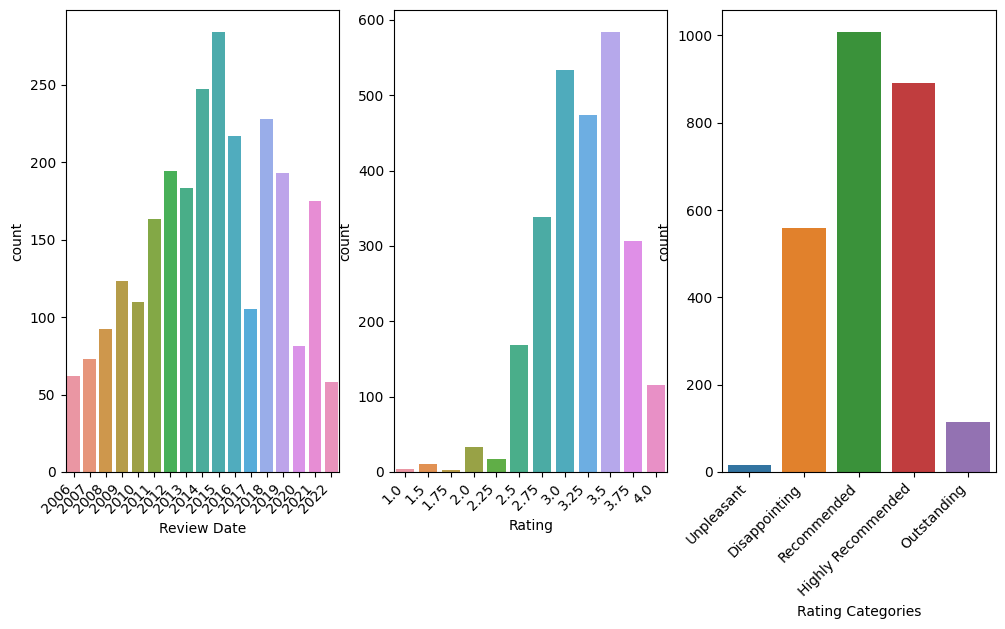

In [103]:
# Activity and ratings
fig, axs = plt.subplots(figsize=(12, 6), ncols=3)

sns.countplot(data=df, x='Review Date', ax=axs[0])
sns.countplot(data=df, x='Rating', ax=axs[1])
sns.countplot(data=df, x='Rating Categories', ax=axs[2], order=['Unpleasant', 'Disappointing', 'Recommended', 'Highly Recommended', 'Outstanding'])

for i in range(len(axs)):
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')

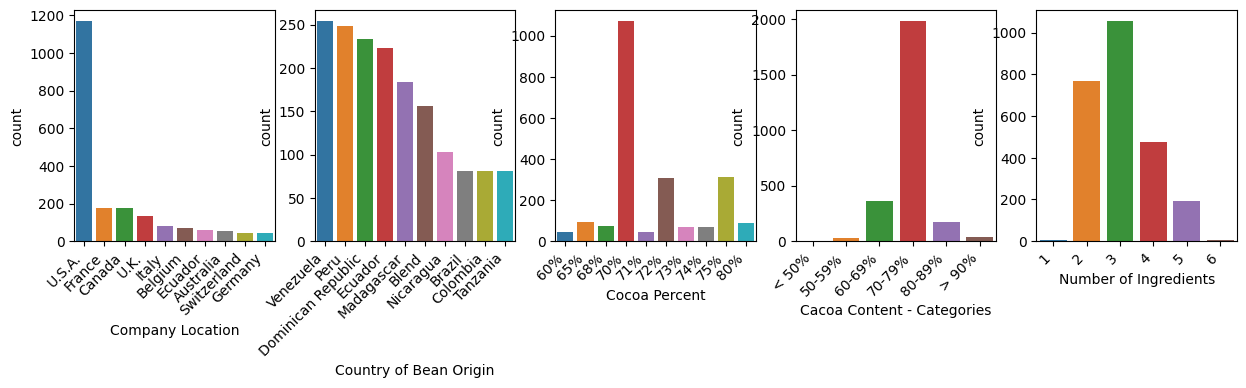

In [104]:
# Manufacturer, bean origin, and cacao content (top 10)
fig, axs = plt.subplots(figsize=(15, 3), ncols=5)

cl = df['Company Location'].value_counts().head(10).to_frame()
sns.barplot(x=cl.index, y=cl['count'], ax=axs[0])

bo = df['Country of Bean Origin'].value_counts().head(10).to_frame()
sns.barplot(x=bo.index, y=bo['count'], ax=axs[1])

cp = df['Cocoa Percent'].value_counts().head(10).sort_index().to_frame()
sns.barplot(x=cp.index, y=cp['count'], ax=axs[2], order=cp.index)

sns.countplot(data=df, x='Cacoa Content - Categories', ax=axs[3], order=['< 50%', '50-59%', '60-69%', '70-79%', '80-89%', '> 90%'])

sns.countplot(data=df, x='Number of Ingredients', ax=axs[4], order=[str(i) for i in range(1,7)])

for i in range(len(axs)):
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')
    #axs[i].xaxis.set_ticks_position("top")

# Data Visualization: Rating Mean Distribution

                    Rating  Count
Company Location                 
Chile             3.750000      2
U.A.E.            3.400000      5
Poland            3.375000      8
Denmark           3.360294     34
Vietnam           3.359375     16


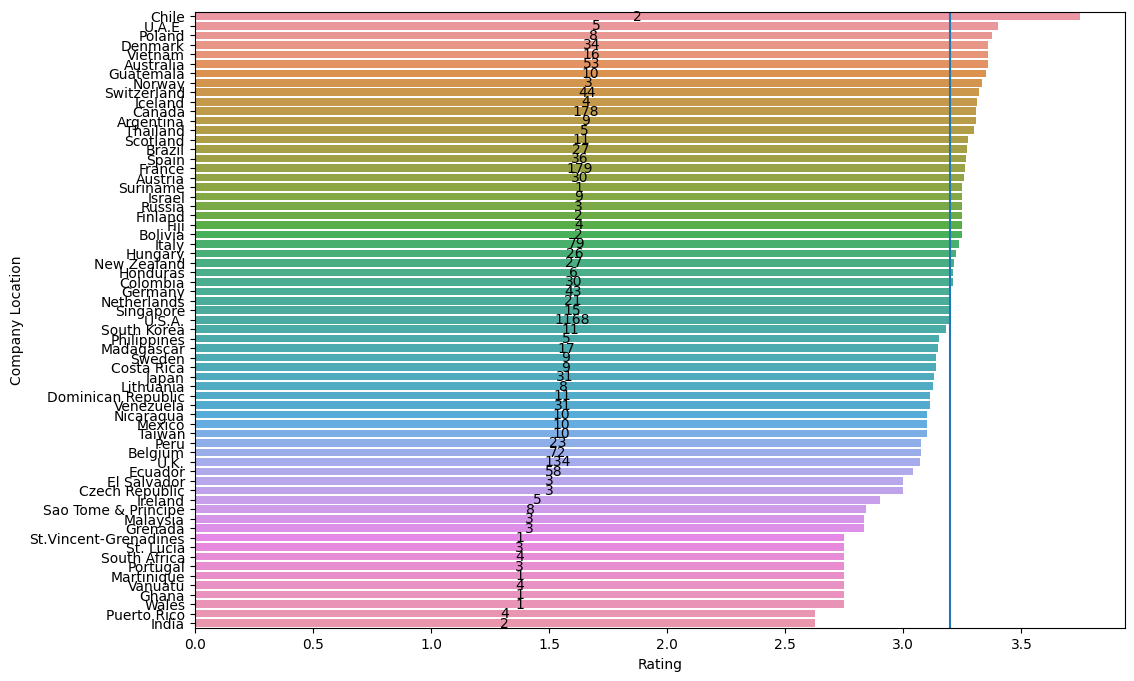

In [105]:
# Company Location
cl_mean = df.groupby('Company Location')['Rating'].mean().sort_values(ascending=False).to_frame()
cl_mean['Count'] = df['Company Location'].value_counts()
print(cl_mean.head())

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
graph = sns.barplot(x=cl_mean['Rating'], y=cl_mean.index)
# Add Country Count as bar label 
ax.bar_label(ax.containers[0], labels=cl_mean['Count'], label_type='center')
# Add Rating mean as horizontal line
graph.axvline(df['Rating'].mean());

                          Rating  Count
Country of Bean Origin                 
Tobago                  3.625000      2
China                   3.500000      1
Sao Tome & Principe     3.500000      2
Solomon Islands         3.450000     10
Congo                   3.318182     11


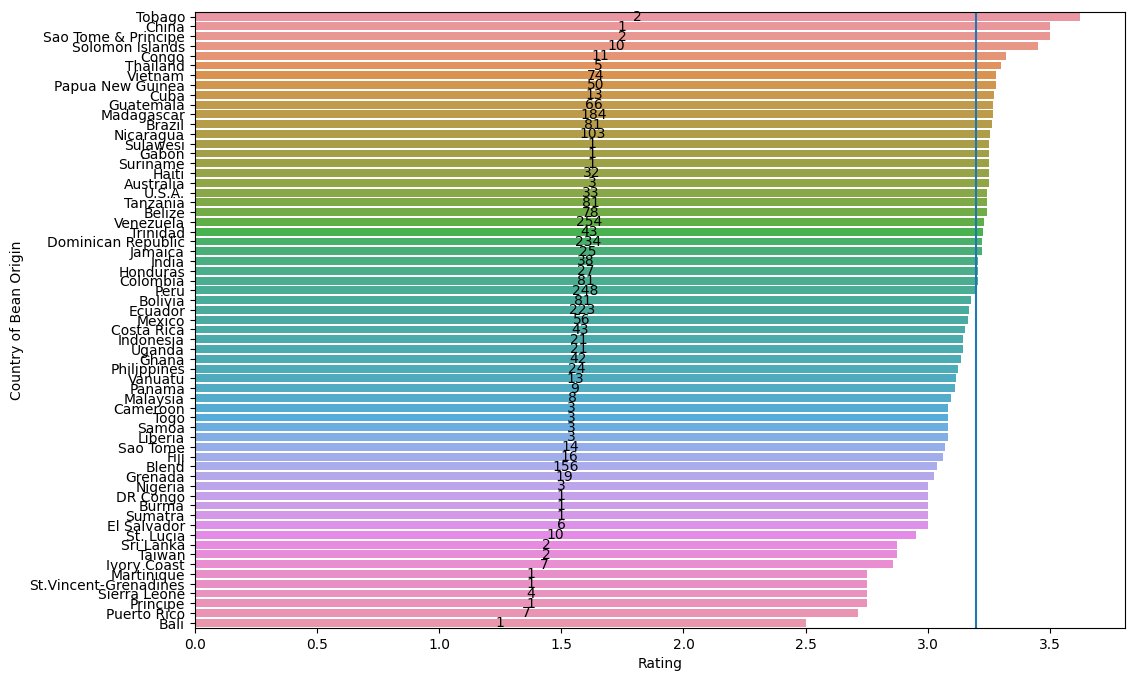

In [106]:
# Country of Bean Origin
cbo_mean = df.groupby('Country of Bean Origin')['Rating'].mean().sort_values(ascending=False).to_frame()
cbo_mean['Count'] = df['Country of Bean Origin'].value_counts()
print(cbo_mean.head())

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
graph = sns.barplot(x=cbo_mean['Rating'], y=cbo_mean.index)
# Add Country Count as bar label 
ax.bar_label(ax.containers[0], labels=cbo_mean['Count'], label_type='center')
# Add Rating mean as horizontal line
graph.axvline(df['Rating'].mean())

               Rating  Count
Review Date                 
2006         3.004032     62
2007         3.102740     73
2008         3.000000     92
2009         3.073171    123
2010         3.152273    110


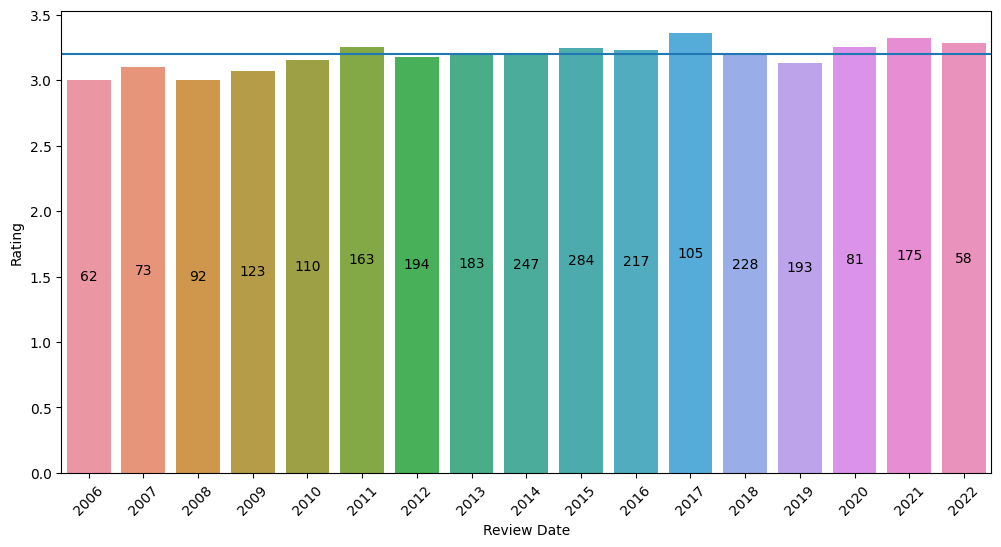

In [107]:
# Review Date
rd_mean = df.groupby('Review Date')['Rating'].mean().to_frame()
rd_mean['Count'] = df['Review Date'].value_counts()
print(rd_mean.head())

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation=45)
graph = sns.barplot(x=rd_mean.index, y=rd_mean['Rating'])
# Add Year Count as bar label 
ax.bar_label(ax.containers[0], labels=rd_mean['Count'], label_type='center')
# Add Rating mean as horizontal line
graph.axhline(df['Rating'].mean());

                         Rating  Count
Number of Ingredients                 
1                      2.958333      6
2                      3.219805    770
3                      3.269450   1054
4                      3.129727    476
5                      3.079843    191


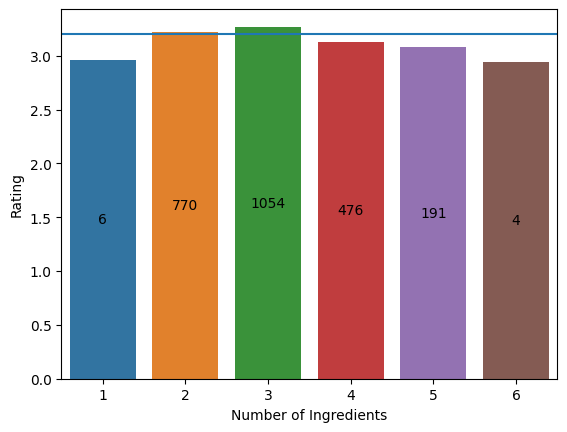

In [108]:
# Number of Ingredients
noi_mean = df.groupby('Number of Ingredients')['Rating'].mean().to_frame()
noi_mean['Count'] = df['Number of Ingredients'].value_counts()
print(noi_mean.head())

# Plot
fig, ax = plt.subplots()
graph = sns.barplot(x=noi_mean.index, y=noi_mean['Rating'])
# Add Year Count as bar label 
ax.bar_label(ax.containers[0], labels=noi_mean['Count'], label_type='center')
# Add Rating mean as horizontal line
graph.axhline(df['Rating'].mean());

                             Rating  Count
Cocoa Percent - Numerical                 
42.0                       2.750000      1
46.0                       2.750000      1
50.0                       3.750000      1
53.0                       2.000000      1
55.0                       2.859375     16
                              Rating  Count
Cacoa Content - Categories                 
50-59%                      2.956897     29
60-69%                      3.215164    366
70-79%                      3.225139   1981
80-89%                      3.050000    175
< 50%                       2.750000      2


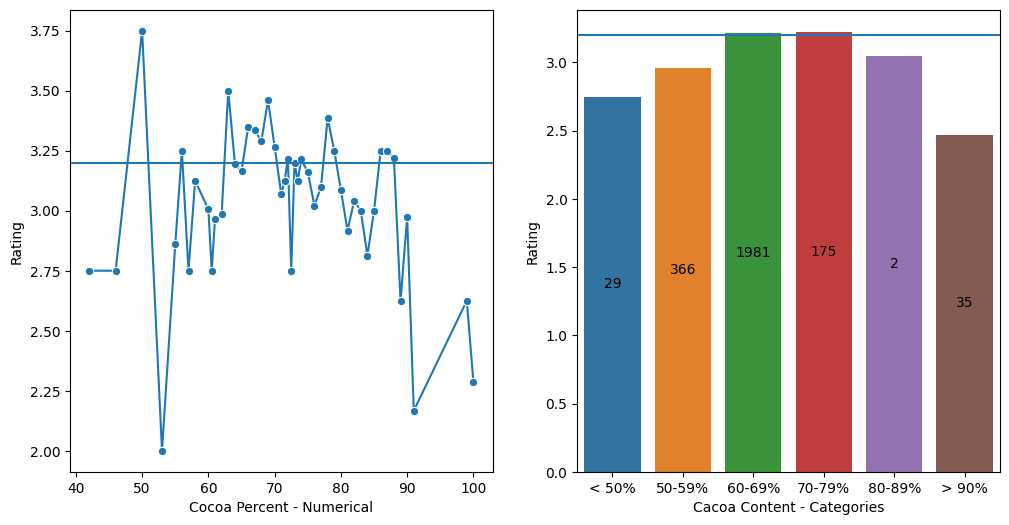

In [109]:
# Cocoa Percent
cp_mean = df.groupby('Cocoa Percent - Numerical')['Rating'].mean().to_frame()
cp_mean['Count'] = df['Cocoa Percent - Numerical'].value_counts()
print(cp_mean.head())

cp_cat_mean = df.groupby('Cacoa Content - Categories')['Rating'].mean().to_frame()
cp_cat_mean['Count'] = df['Cacoa Content - Categories'].value_counts()
print(cp_cat_mean.head())

# Plot
fig, axs = plt.subplots(figsize=(12, 6), ncols=2)

graph1 = sns.lineplot(x=cp_mean.index, y=cp_mean['Rating'], marker="o", ax=axs[0])
# Add Percent Count as bar label
#axs[0].bar_label(axs[0].containers[0], labels=cp_mean['Count'], label_type='center')
# Add Rating mean as horizontal line
graph1.axhline(df['Rating'].mean())

graph2 = sns.barplot(x=cp_cat_mean.index, y=cp_cat_mean['Rating'], order=['< 50%', '50-59%', '60-69%', '70-79%', '80-89%', '> 90%'], ax=axs[1])
# Add Percent Count as bar label 
axs[1].bar_label(axs[1].containers[0], labels=cp_cat_mean['Count'], label_type='center')
# Add Rating mean as horizontal line
graph2.axhline(df['Rating'].mean());

#axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90);

  Ingredient Contained Rating Mean Count
0          B     False           0     0
0          B      True    3.211815  2501
1          S     False         3.0    84
1          S      True    3.219177  2417
2         S*     False    3.218441  2424


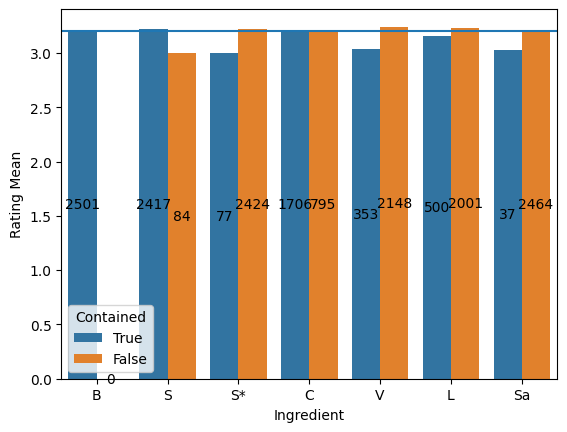

In [110]:
# Type of Ingredients (contained or not)
ings_ls = []

for i in unique_ingredients:
    temp_df = df.groupby(f'Ingredient {i}')['Rating'].mean().to_frame()
    temp_df['Count'] = df.groupby(f'Ingredient {i}')['Rating'].count()
    temp_ls = [i, list(temp_df.index), list(temp_df['Rating']), temp_df['Count']]
    ings_ls.append(temp_ls)

ings = pd.DataFrame(ings_ls, columns = ['Ingredient', 'Contained', 'Rating Mean', 'Count'])
ings = ings.explode(['Contained', 'Rating Mean', 'Count'])
ings_B_False = pd.DataFrame([['B', False, 0, 0]], columns = ['Ingredient', 'Contained', 'Rating Mean', 'Count'])
ings = pd.concat([ings_B_False, ings])
print(ings.head())

# Plot
fig, ax = plt.subplots()
graph = sns.barplot(data=ings,  x='Ingredient', y='Rating Mean', hue='Contained', hue_order=[True, False])
# Add Ingredient Count as bar label
ax.bar_label(ax.containers[0], labels=ings.loc[ings['Contained'] == True]['Count'], label_type='center')
ax.bar_label(ax.containers[1], labels=ings.loc[ings['Contained'] == False]['Count'], label_type='center')
# Add Rating mean as horizontal line
graph.axhline(df['Rating'].mean());


  Characteristic Mentioned Rating Mean Count
0          sweet     False    3.218971  2264
0          sweet      True    3.054012   324
1          nutty     False    3.187229  2306
1          nutty      True    3.289007   282
2          cocoa     False    3.161915  2157


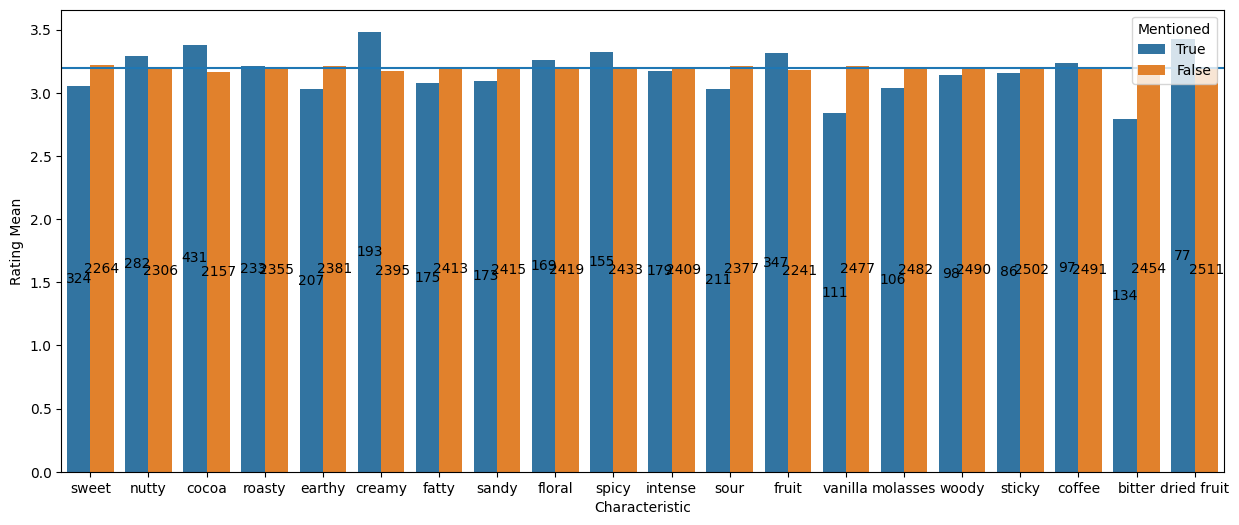

In [111]:
# Most Memorable Characteristics (mentioned or not)
chrs_ls = []

for i in top_characts:
    temp_df = df.groupby(f'Characteristic - {i}')['Rating'].mean().to_frame()
    temp_df['Count'] = df.groupby(f'Characteristic - {i}')['Rating'].count()
    temp_ls = [i, list(temp_df.index), list(temp_df['Rating']), temp_df['Count']]
    chrs_ls.append(temp_ls)
#print(chrs_ls)

chrs = pd.DataFrame(chrs_ls, columns = ['Characteristic', 'Mentioned', 'Rating Mean', 'Count'])
chrs = chrs.explode(['Mentioned', 'Rating Mean', 'Count'])
print(chrs.head())

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
graph = sns.barplot(data=chrs,  x='Characteristic', y='Rating Mean', hue='Mentioned', hue_order=[True, False])
# Add Characteristic Count as bar label
ax.bar_label(ax.containers[0], labels=chrs.loc[chrs['Mentioned'] == True]['Count'], label_type='center')
ax.bar_label(ax.containers[1], labels=chrs.loc[chrs['Mentioned'] == False]['Count'], label_type='center')
# Add Rating mean as horizontal line
graph.axhline(df['Rating'].mean());


# Data Visualization: Variable Distribution and Rating Means

### Ratings and Sampling Activity

               Rating  Count
Review Date                 
2006         3.004032     62
2007         3.102740     73
2008         3.000000     92
2009         3.073171    123
2010         3.152273    110


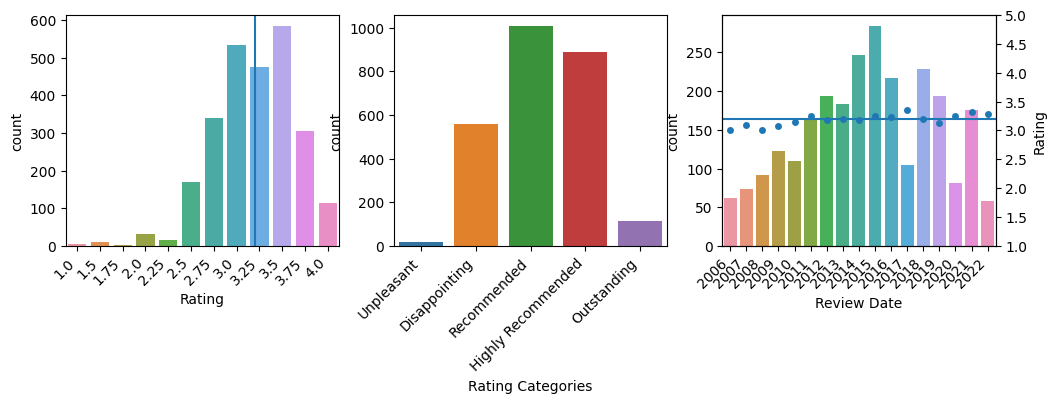

In [142]:
fig, axs = plt.subplots(figsize=(12, 3), ncols=3)

# Rating Numeric
sns.countplot(data=df, x='Rating', ax=axs[0])
# draw mean (~3.2, which is between x-point 7 (=3.0) and 8 (=3.25))
axs[0].axvline(7.8)

# Rating Categories
sns.countplot(data=df, x='Rating Categories', ax=axs[1], order=['Unpleasant', 'Disappointing', 'Recommended', 'Highly Recommended', 'Outstanding'])

# Review Date
rd_mean = df.groupby('Review Date')['Rating'].mean().to_frame()
rd_mean['Count'] = df['Review Date'].value_counts()
print(rd_mean.head())

ax2_1 = axs[2].twinx()
sns.countplot(data=df, x='Review Date', ax=axs[2])
sns.stripplot(x=rd_mean.index, y=rd_mean['Rating'], ax=ax2_1)
ax2_1.set_ylim(1,5)
ax2_1.axhline(df['Rating'].mean());

for i in range(len(axs)):
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')


### Manufacturer and bean origin (top 20)

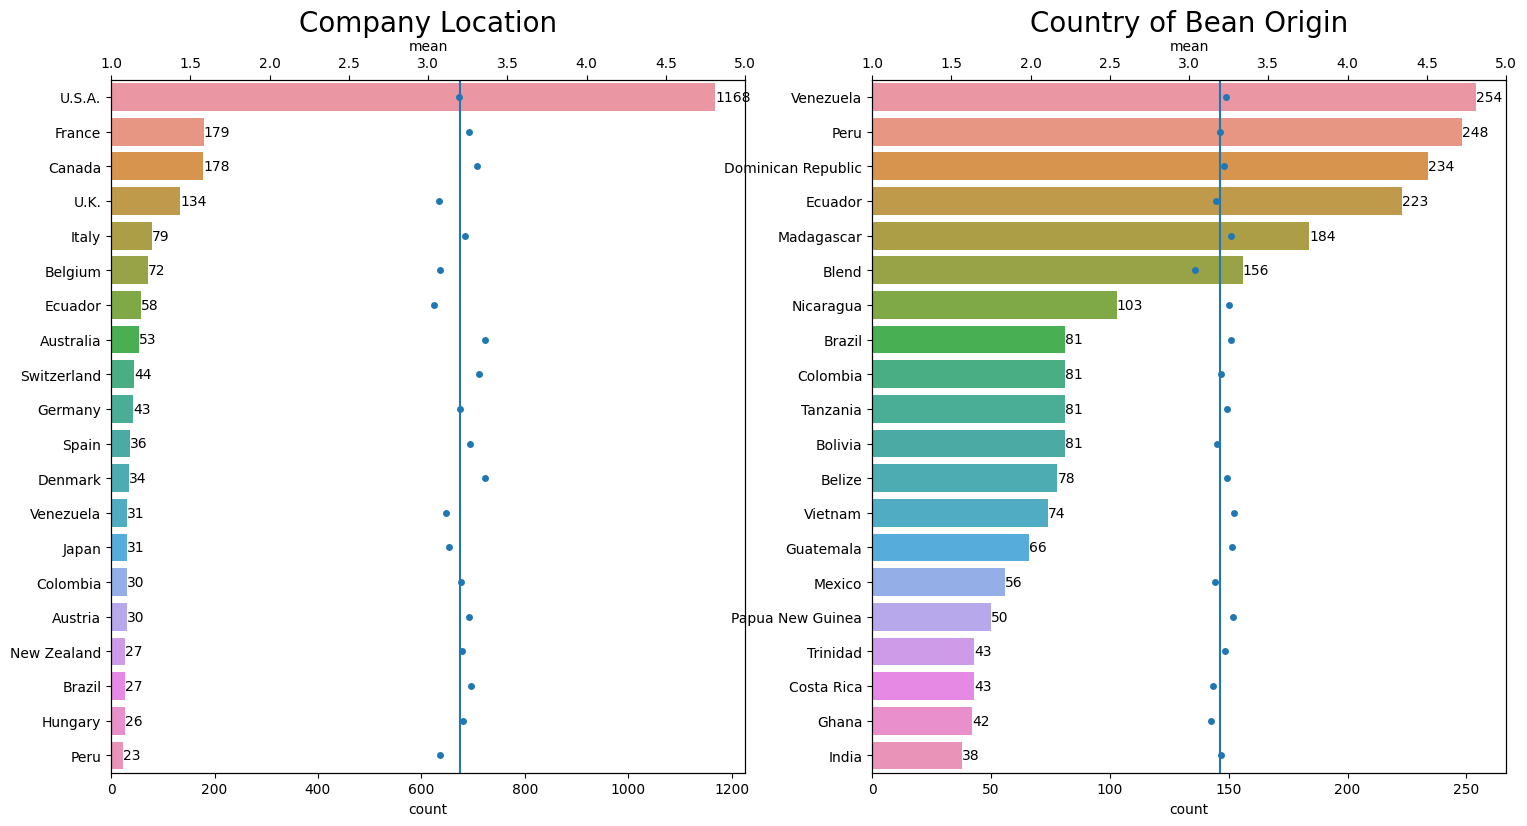

In [181]:
fig, axs = plt.subplots(figsize=(18, 9), ncols=2)

vars = ['Company Location', 'Country of Bean Origin']

for nr, var in enumerate(vars):
    # count country occurence and store top 20
    var_count = df[var].value_counts().head(20).to_frame()
    var_top20 = var_count.index.tolist()
    
    # get the aggregated mean for the top 20 countries
    var_means_ls = []
    for i in var_count.index:
        var_means_ls.append(df[df[var] == i]['Rating'].mean())
    var_count['mean'] = var_means_ls

    # Plot
    sns.barplot(x=var_count['count'], y=var_count.index, ax=axs[nr]).set_title(var, fontdict={'size': 20})
    axs2 = axs[nr].twiny()
    sns.stripplot(x=var_count['mean'], y=var_count.index, ax=axs2)
    axs2.set_xlim(1,5)
    axs2.axvline(df['Rating'].mean())
    axs[nr].bar_label(axs[nr].containers[0], labels=var_count['count'])
    axs[nr].set(ylabel=None)

### Cocoa Percent

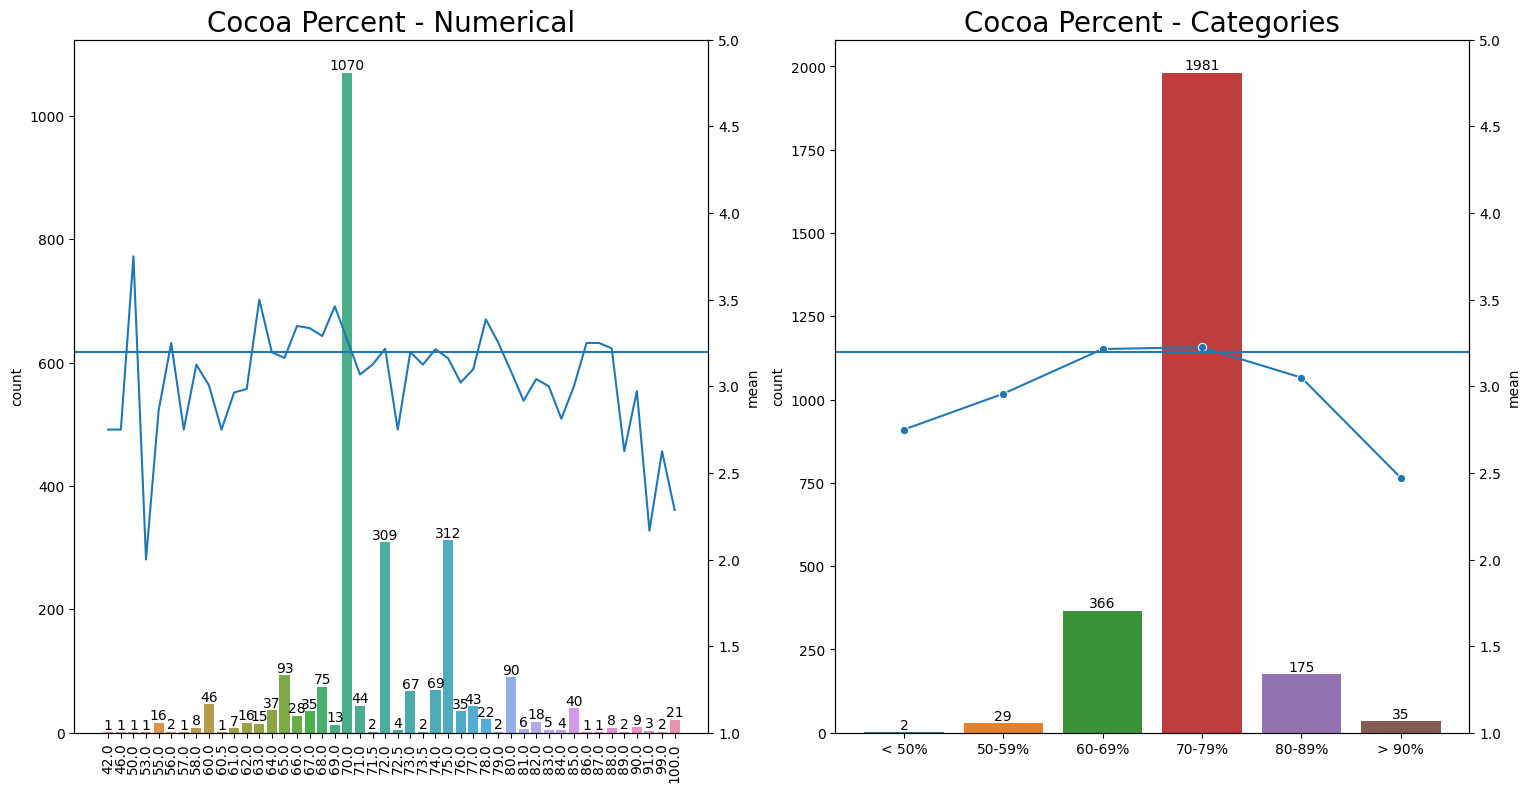

In [248]:
fig, axs = plt.subplots(figsize=(18, 9), ncols=2)

# Cocoa Percent - Numerical
cpn_count = df['Cocoa Percent - Numerical'].value_counts().to_frame()
cpn_count['mean'] = df.groupby('Cocoa Percent - Numerical')['Rating'].mean()
cpn_count = cpn_count.sort_index()
cpn_count.index = cpn_count.index.map(str)
# Plot
sns.barplot(x=cpn_count.index, y=cpn_count['count'], ax=axs[0]).set_title('Cocoa Percent - Numerical', fontdict={'size': 20})
axs0_1 = axs[0].twinx()
sns.lineplot(x=cpn_count.index, y=cpn_count['mean'], ax=axs0_1)
axs0_1.set_ylim(1,5)
axs0_1.axhline(df['Rating'].mean())
axs[0].bar_label(axs[0].containers[0], labels=cpn_count['count'])
axs[0].set(xlabel=None)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90);

# Cocoa Content - Categories
cpc_count = df['Cocoa Percent - Categories'].value_counts().to_frame()
cpc_count['mean'] = df.groupby('Cocoa Percent - Categories')['Rating'].mean()
cpc_order = ['< 50%', '50-59%', '60-69%', '70-79%', '80-89%', '> 90%']
cpc_count = cpc_count.sort_index(key=lambda x: x.map(lambda y: cpc_order.index(y)))
# Plot
sns.barplot(x=cpc_count.index, y=cpc_count['count'], order=cpc_order, ax=axs[1]).set_title('Cocoa Percent - Categories', fontdict={'size': 20})
axs1_1 = axs[1].twinx()
sns.lineplot(x=cpc_count.index, y=cpc_count['mean'], marker='o', ax=axs1_1)
axs1_1.set_ylim(1,5)
axs1_1.axhline(df['Rating'].mean())
axs[1].bar_label(axs[1].containers[0], labels=cpc_count['count'])
axs[1].set(xlabel=None);

In [ ]:


sns.countplot(data=df, x='Number of Ingredients', ax=axs[4], order=[str(i) for i in range(1,7)])
